In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga de los archivos Parquet
df_movies = pd.read_parquet('../ETL/movies.parquet')
df_credits = pd.read_parquet('../ETL/creditsP.parquet')


In [ ]:
df_movies.describe

**1. Descripción General del Conjunto de Datos**
* Forma y Estructura: Revisa el número de filas y columnas.
* Tipos de Datos: Identifica los tipos de datos de cada columna.
* Valores Faltantes: Determina si hay valores faltantes.

In [ ]:
# Descripción General
print(df_movies.shape)
print(df_movies.dtypes)
print(df_movies.isnull().sum())

**2. Análisis Univariado**
* Características Numéricas: Analiza las distribuciones de budget, revenue, runtime, vote_average, vote_count y return.
* Características Categóricas: Examina los valores únicos en genre_name, language_name, status.

c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


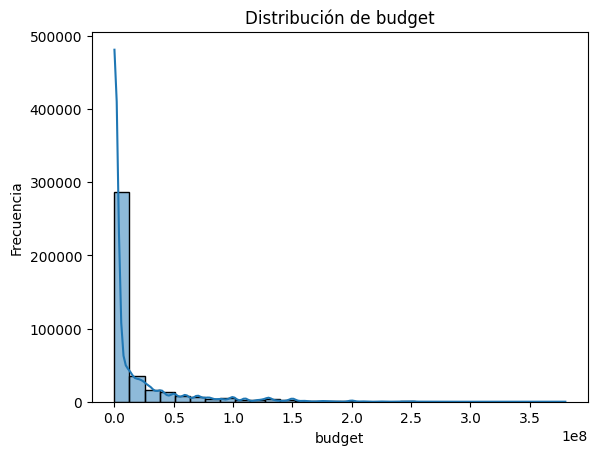

c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


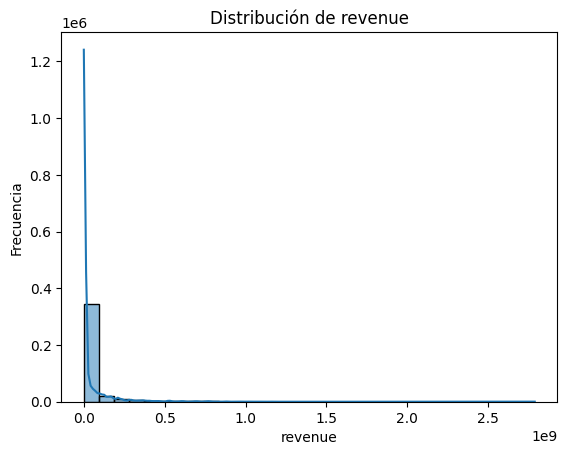

c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


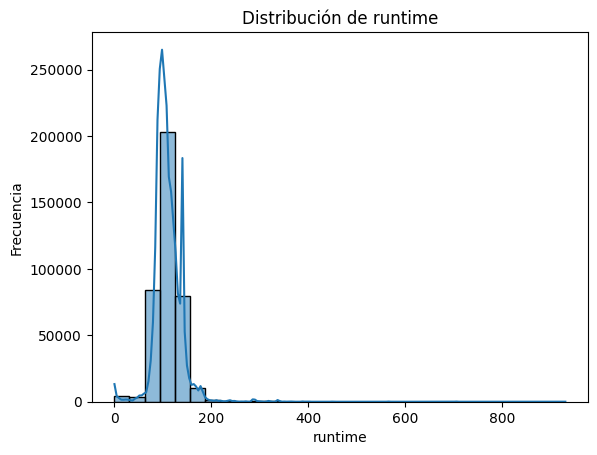

c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


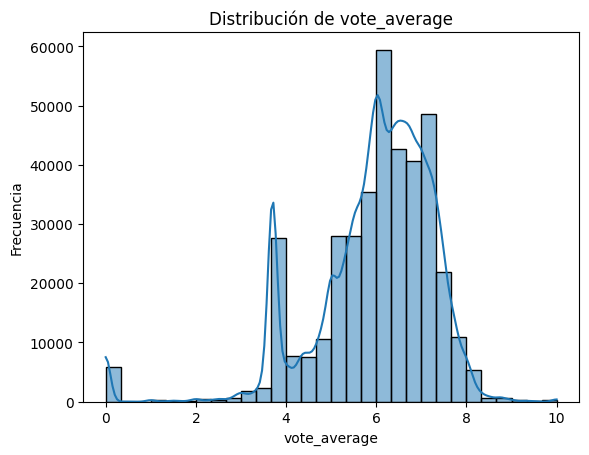

c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


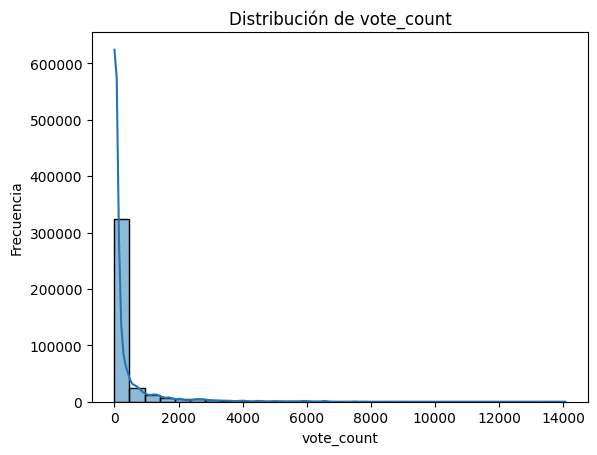

c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


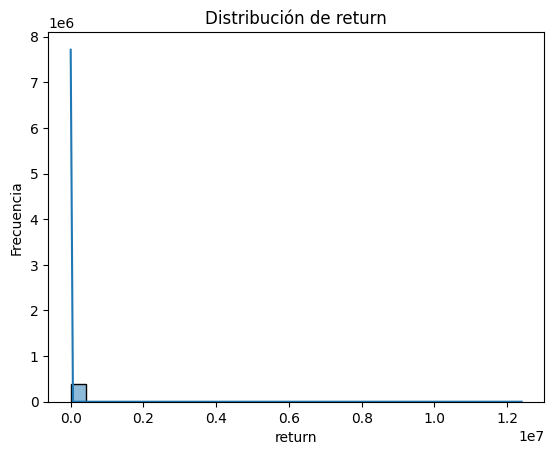

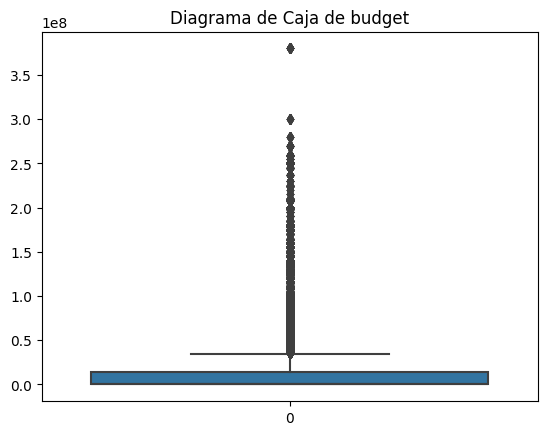

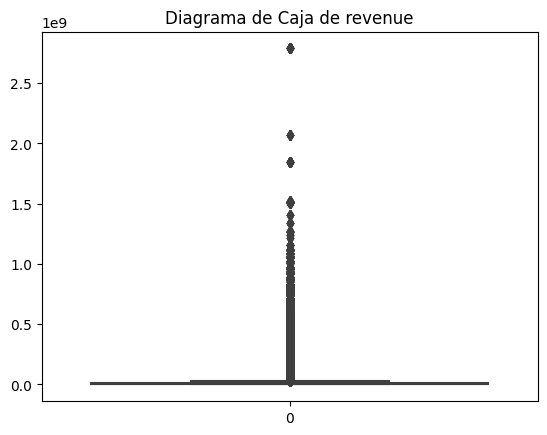

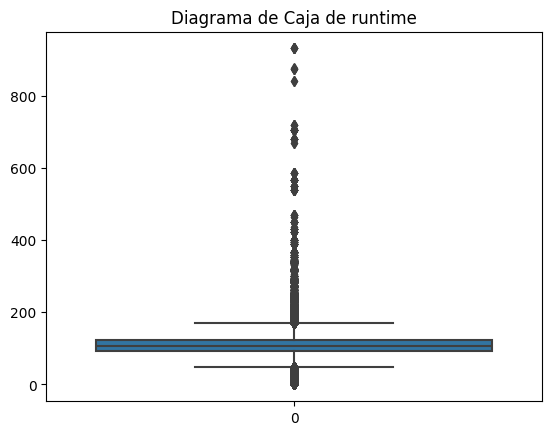

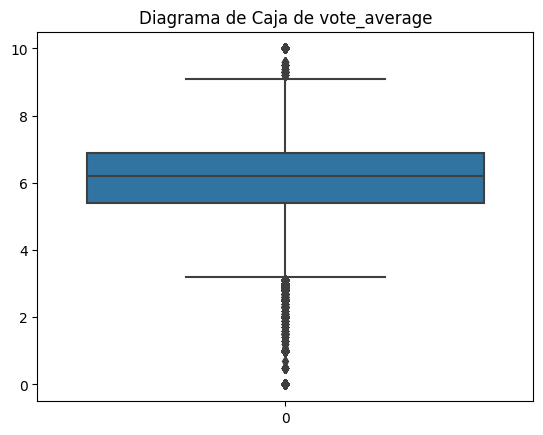

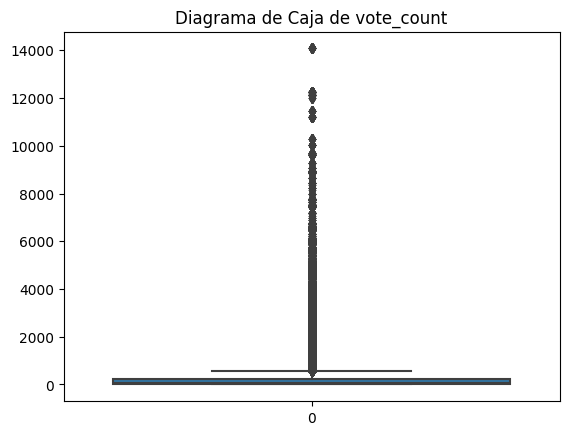

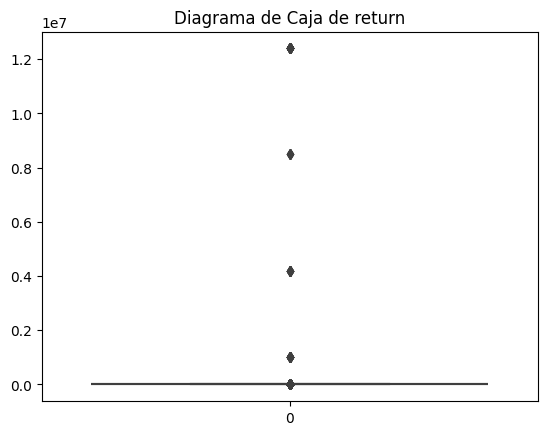

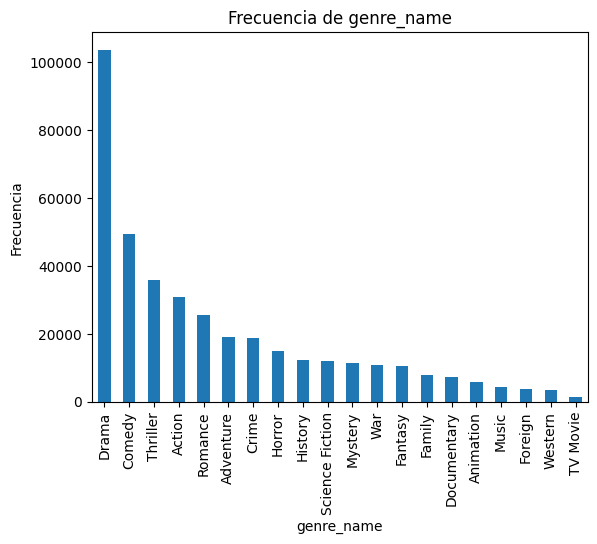

c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\david\Documents\proyectoinv\my_pyt\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 368

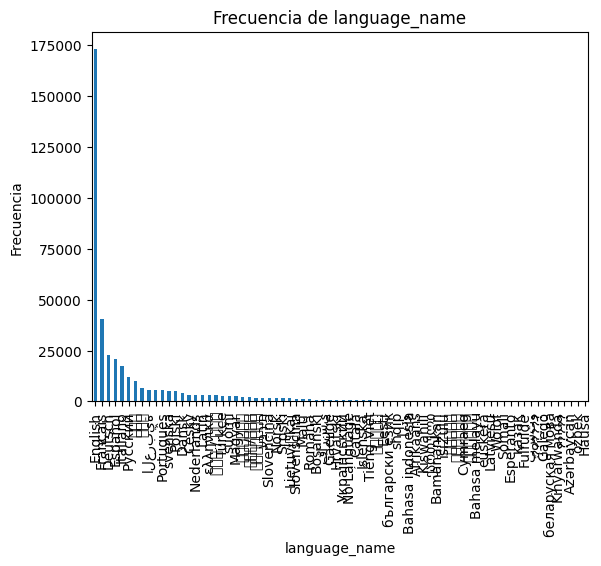

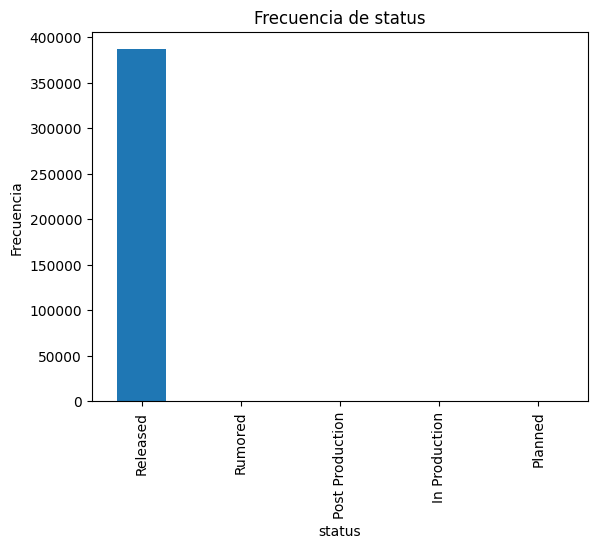

In [20]:
# Características Numéricas
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']
df_movies[num_cols].describe()

for col in num_cols:
    plt.figure()
    sns.histplot(df_movies[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(df_movies[col])
    plt.title(f'Diagrama de Caja de {col}')
    plt.show()

# Características Categóricas
cat_cols = ['genre_name', 'language_name', 'status']

for col in cat_cols:
    plt.figure()
    df_movies[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

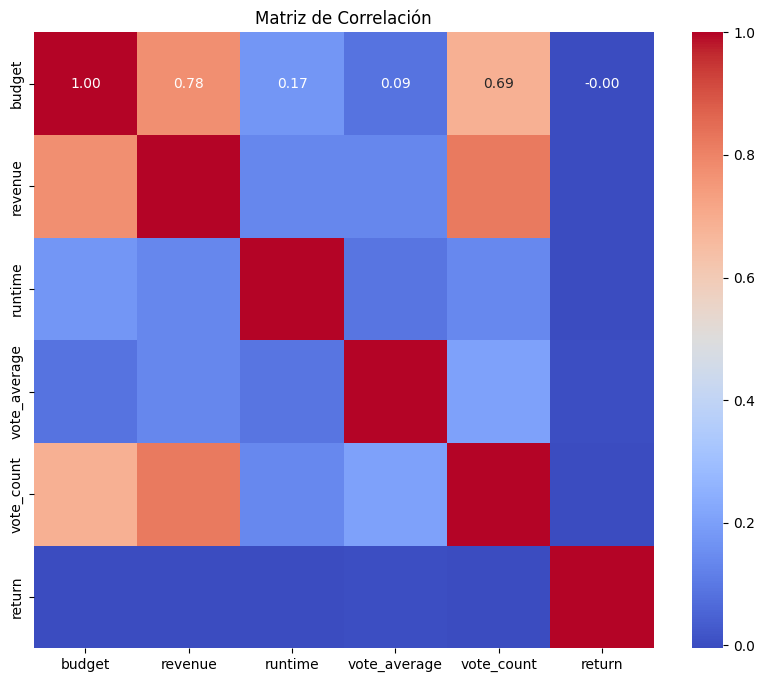

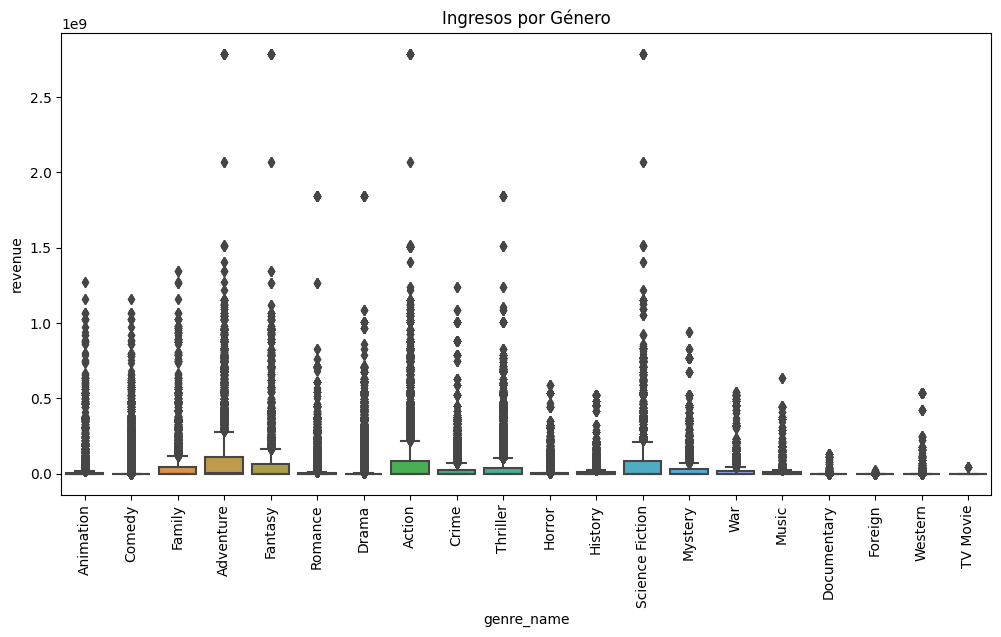

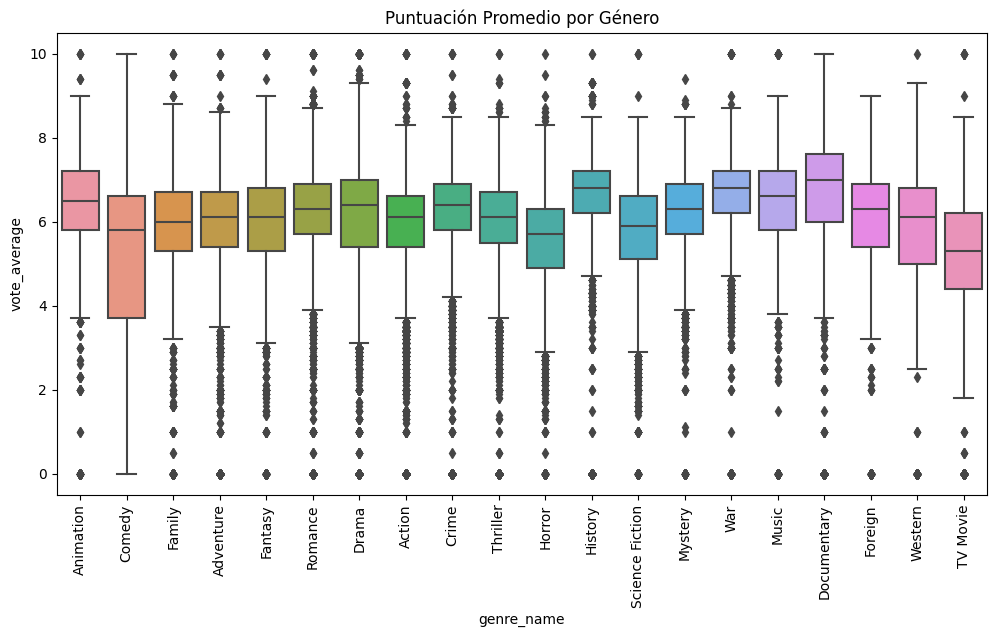

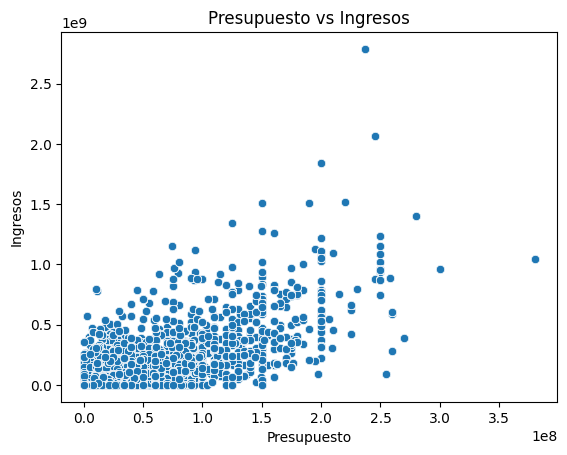

TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1200x600 with 0 Axes>

In [21]:
# Matriz de Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_movies[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Revenue y Vote Average por Género
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_name', y='revenue', data=df_movies)
plt.title('Ingresos por Género')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_name', y='vote_average', data=df_movies)
plt.title('Puntuación Promedio por Género')
plt.xticks(rotation=90)
plt.show()

# Budget vs Revenue
plt.figure()
sns.scatterplot(x='budget', y='revenue', data=df_movies)
plt.title('Presupuesto vs Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

# Tendencias de Popularidad a lo largo de los años
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='vote_average', data=df_movies.groupby('release_year').mean().reset_index())
plt.title('Tendencias de Popularidad a lo largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Puntuación Promedio')
plt.show()

In [22]:
# Ingeniería de Características: Promedio de voto e ingresos por género
grupo_genero = df_movies.groupby('genre_name').agg({'vote_average': 'mean', 'revenue': 'mean'}).reset_index()
print(grupo_genero)

         genre_name  vote_average       revenue
0            Action      5.912333  8.014462e+07
1         Adventure      5.927236  1.017082e+08
2         Animation      6.441722  4.208439e+07
3            Comedy      5.444836  1.825157e+07
4             Crime      6.237849  3.300135e+07
5       Documentary      6.341340  1.954991e+06
6             Drama      6.011009  1.601595e+07
7            Family      5.935125  6.314792e+07
8           Fantasy      5.954611  7.710933e+07
9           Foreign      6.044092  1.375545e+05
10          History      6.596731  2.350377e+07
11           Horror      5.521659  1.784514e+07
12            Music      6.404837  1.840258e+07
13          Mystery      6.162490  3.823761e+07
14          Romance      6.154530  2.131313e+07
15  Science Fiction      5.735730  8.066965e+07
16         TV Movie      4.957152  2.526738e+05
17         Thriller      5.984814  5.047326e+07
18              War      6.586205  2.892000e+07
19          Western      5.741861  1.929